In [ ]:
+ stat desc sur la base
+ reg 
+ tests

In [ ]:
Selection des variables d'amenites 
Regressions sans amenites, methode loyers reels vs loyers imputés -> 
Regressions avec amenites

In [ ]:
Selection des variables d'amenites

In [60]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [61]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


In [ ]:
Statistiques croisées par territoire, sur nos variables dépendantes 

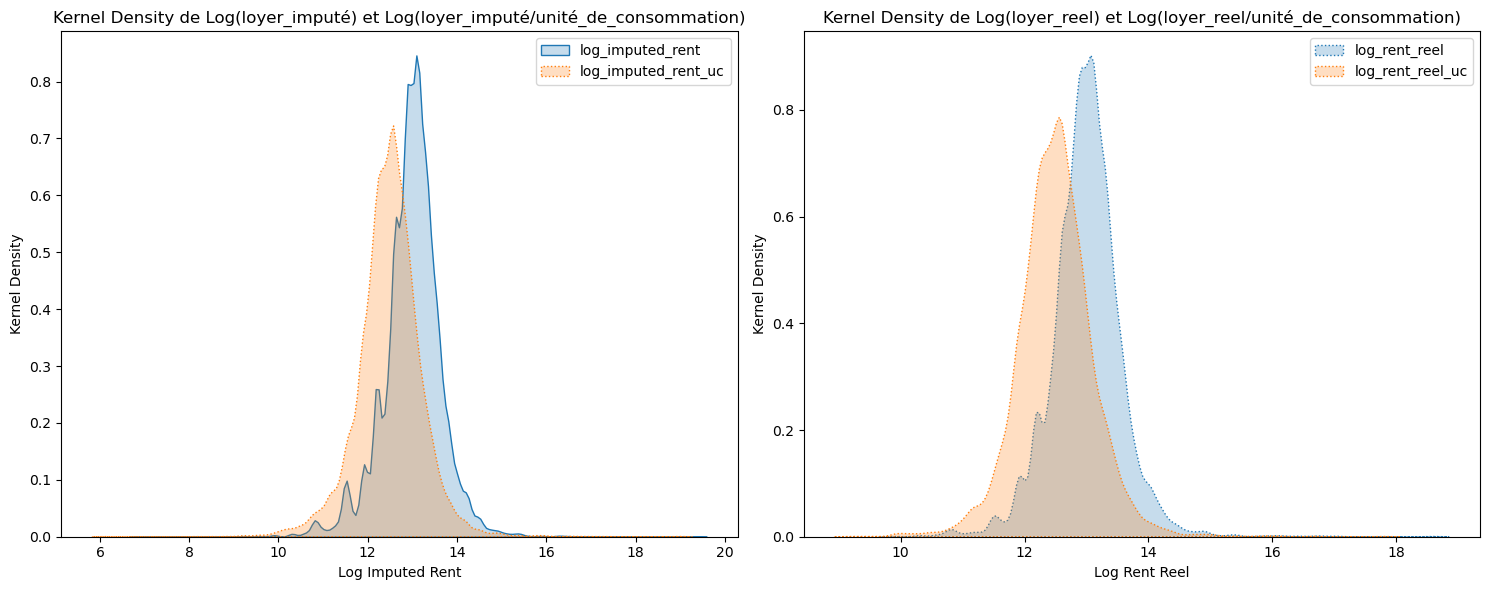

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# configurer le graphique
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

 # plot 1: 
# tracer la densité de log_imputed_rent
sns.kdeplot(total_dataset_clean['log_imputed_rent'], label='log_imputed_rent', fill=True, ax=axes[0])
# et de la densité de log_imputed_rent_uc
sns.kdeplot(total_dataset_clean['log_imputed_rent_uc'], label='log_imputed_rent_uc', fill=True, linestyle='dotted', ax=axes[0])
# définir les labels des axes et titre
plt.xlabel('Log Imputed Rent')
plt.ylabel('Kernel Density')
plt.title('Kernel Density de Log(loyer_imputé) et Log(loyer_imputé/unité_de_consommation)')

axes[0].set_xlabel('Log Imputed Rent')
axes[0].set_ylabel('Kernel Density')
axes[0].set_title('Kernel Density de Log(loyer_imputé) et Log(loyer_imputé/unité_de_consommation)')
axes[0].legend()

 # plot 2: 
# tracer la densité de log_rent_reel
sns.kdeplot(total_dataset_clean['log_rent_reel'], label='log_rent_reel', fill=True, linestyle='dotted', ax=axes[1])
# et de la densité de log_rent_reel_uc
sns.kdeplot(total_dataset_clean['log_rent_reel_uc'], label='log_rent_reel_uc', fill=True, linestyle='dotted', ax=axes[1])
# définir les labels des axes et titre
axes[1].set_xlabel('Log Rent Reel')
axes[1].set_ylabel('Kernel Density')
axes[1].set_title('Kernel Density de Log(loyer_reel) et Log(loyer_reel/unité_de_consommation)')
axes[1].legend()

# ajuster la mise en page
plt.tight_layout()

# afficher les graphiques
plt.show()



In [ ]:
Statistiques croisées par territoire, sur nos variables de contrôles 



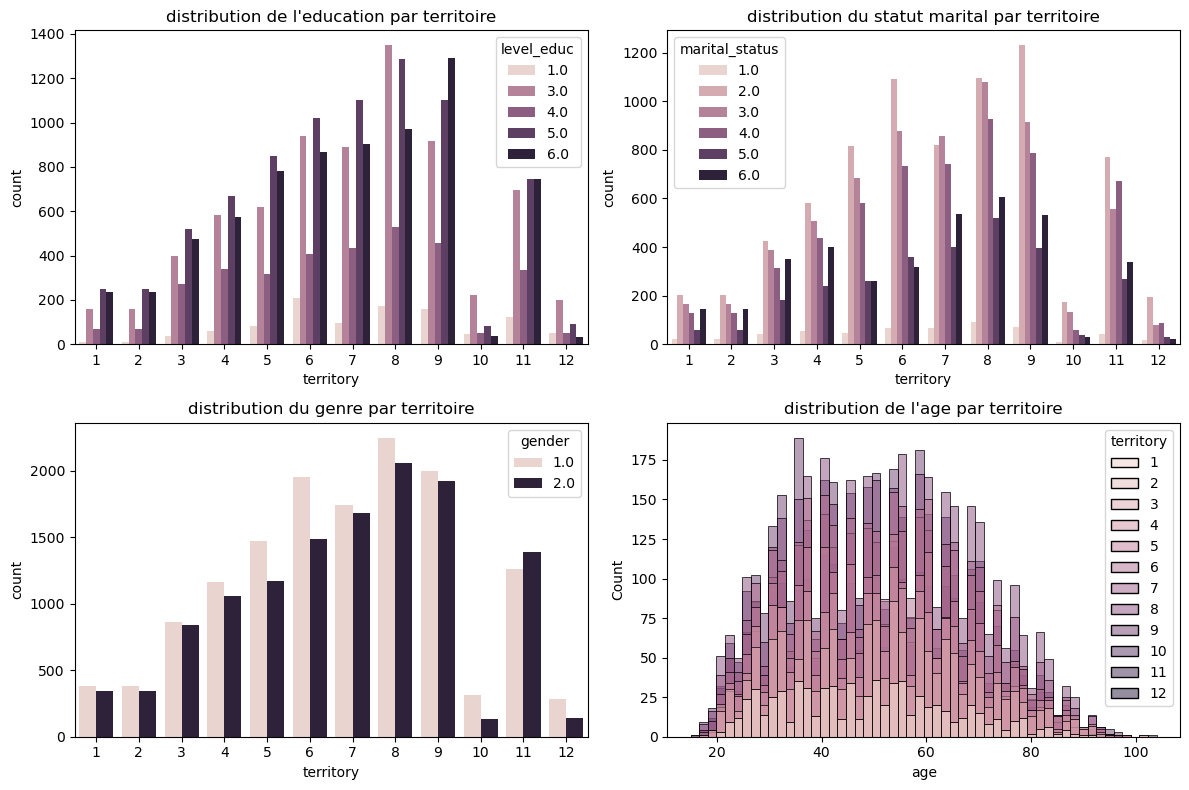

In [51]:
### Quelques stat desc

import seaborn as sns
import matplotlib.pyplot as plt

# pavage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# graphique 1 : distribution de l'éducation par territoire
sns.countplot(x='territory', hue='level_educ', data=total_dataset_clean, ax=axes[0, 0])
axes[0, 0].set_title('distribution de l\'education par territoire')

# graphique 2 : distribution du statut marital par territoire
sns.countplot(x='territory', hue='marital_status', data=total_dataset_clean, ax=axes[0, 1])
axes[0, 1].set_title('distribution du statut marital par territoire')

# graphique 3 : distribution du genre par territoire
sns.countplot(x='territory', hue='gender', data=total_dataset_clean, ax=axes[1, 0])
axes[1, 0].set_title('distribution du genre par territoire')

# graphique 4 : distribution de l'âge par territoire
sns.histplot(x='age', hue='territory', data=total_dataset_clean, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('distribution de l\'age par territoire')

# ajuster la mise en page
plt.tight_layout()

# afficher les graphiques
plt.show()

In [3]:
total_dataset_clean

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,gender,P6030S1,P6030S3,age,...,own_status,territory,rent_reel,log_rent_reel,rent_reel_uc,log_rent_reel_uc,imputed_rent,log_imputed_rent,imputed_rent_uc,log_imputed_rent_uc
0,6037206.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1963.0,58.0,...,0,3,800000.0,13.592367,565685.424949,13.245793,800000.0,13.592367,565685.424949,13.592367
1,6037207.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1979.0,42.0,...,0,3,750000.0,13.527828,283473.354757,12.554873,750000.0,13.527828,283473.354757,13.527828
2,6037209.0,1.0,1.0,1.0,10,1.0,2.0,11.0,1977.0,44.0,...,0,3,700000.0,13.458836,494974.746831,13.112262,700000.0,13.458836,494974.746831,13.458836
3,6037210.0,1.0,1.0,1.0,10,1.0,1.0,8.0,1972.0,49.0,...,0,3,750000.0,13.527828,433012.701892,12.978522,750000.0,13.527828,433012.701892,13.527828
4,6037211.0,1.0,1.0,1.0,10,1.0,2.0,8.0,1986.0,35.0,...,0,3,740000.0,13.514405,427239.199200,12.965099,740000.0,13.514405,427239.199200,13.514405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26625,6062932.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1965.0,56.0,...,0,8,200000.0,12.206073,200000.000000,12.206073,200000.0,12.206073,200000.000000,12.206073
26626,6062935.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1981.0,40.0,...,1,8,NaN,NaN,NaN,NaN,250000.0,12.429216,144337.567297,12.429216
26627,6062936.0,1.0,1.0,1.0,10,1.0,1.0,5.0,1961.0,60.0,...,1,8,NaN,NaN,NaN,NaN,80000.0,11.289782,40000.000000,11.289782
26628,6062950.0,1.0,1.0,1.0,10,1.0,1.0,2.0,1995.0,26.0,...,1,8,NaN,NaN,NaN,NaN,150000.0,11.918391,106066.017178,11.918391


In [63]:

y_method_A_reg1 = total_dataset_clean[['log_rent_reel','log_rent_reel_uc']]
X_reg_sans_amenite_sans_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender']]

data_A_reg1 = pd.concat([X_reg_sans_amenite_sans_ownership, y_method_A_reg1], axis=1).dropna()
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3.0,3,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3.0,3,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3.0,3,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3.0,3,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3.0,3,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
26508,4.0,1.0,8,6.0,36.0,3.0,1.0,12.765688,11.960969
26510,3.0,1.0,8,5.0,33.0,4.0,2.0,12.206073,11.656767
26553,2.0,1.0,12,5.0,20.0,2.0,2.0,11.156251,10.463103
26614,3.0,1.0,4,5.0,36.0,3.0,1.0,12.611538,12.062232


In [64]:
data_A_reg1['Utilrank'] = data_A_reg1['Utilrank'].astype(int)
data_A_reg1['territory'] = data_A_reg1['territory'].astype(int)

In [65]:
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3,3,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3,3,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3,3,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3,3,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3,3,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
26508,4.0,1,8,6.0,36.0,3.0,1.0,12.765688,11.960969
26510,3.0,1,8,5.0,33.0,4.0,2.0,12.206073,11.656767
26553,2.0,1,12,5.0,20.0,2.0,2.0,11.156251,10.463103
26614,3.0,1,4,5.0,36.0,3.0,1.0,12.611538,12.062232


In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# Your regression model
mod = smf.ols(formula='log_rent_reel ~ Numrooms + C(Utilrank) + C(territory) + level_educ + age + marital_status + gender', data=data_A_reg1)
res = mod.fit()

# Define the columns you want to include in the summary
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# Create the summary table including only the specified columns
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['Numrooms', 'C(Utilrank)[T.1]', 'C(territory)[T.1]', 'level_educ', 'age', 'marital_status', 'gender'])
display(summary_table)

,OLS
Numrooms,0.1855***
,(0.0037)
level_educ,0.0769***
,(0.0036)
age,0.0025***
,(0.0003)
marital_status,-0.0088***
,(0.0026)
gender,-0.0134*
,(0.0077)


In [67]:
mod = smf.ols(formula='log_rent_reel ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.9920,0.033,362.432,0.000,11.927,12.057
C(Utilrank)[T.2],0.2418,0.009,25.573,0.000,0.223,0.260
C(Utilrank)[T.3],0.4494,0.011,41.861,0.000,0.428,0.470
C(Utilrank)[T.4],0.7859,0.017,46.381,0.000,0.753,0.819
C(Utilrank)[T.5],0.9655,0.032,30.627,0.000,0.904,1.027
C(Utilrank)[T.6],1.3315,0.048,27.800,0.000,1.238,1.425
C(Utilrank)[T.9],-0.4736,0.047,-10.090,0.000,-0.566,-0.382
C(territory)[T.2],5.772e-15,0.027,2.11e-13,1.000,-0.054,0.054
C(territory)[T.3],-0.1727,0.023,-7.402,0.000,-0.218,-0.127
C(territory)[T.4],-0.2356,0.023,-10.360,0.000,-0.280,-0.191


In [70]:
#reduction des coefficients avec unite de consommation (composition du menage)
#on veut reduire l'effet taille des menages 

mod = smf.ols(formula='log_rent_reel_uc ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.3491,0.037,306.391,0.000,11.276,11.422
C(Utilrank)[T.2],0.2733,0.011,25.821,0.000,0.253,0.294
C(Utilrank)[T.3],0.5269,0.012,43.841,0.000,0.503,0.550
C(Utilrank)[T.4],0.9269,0.019,48.864,0.000,0.890,0.964
C(Utilrank)[T.5],1.1268,0.035,31.928,0.000,1.058,1.196
C(Utilrank)[T.6],1.4596,0.054,27.221,0.000,1.354,1.565
C(Utilrank)[T.9],-0.4696,0.053,-8.937,0.000,-0.573,-0.367
C(territory)[T.2],3.552e-15,0.031,1.16e-13,1.000,-0.060,0.060
C(territory)[T.3],-0.1133,0.026,-4.338,0.000,-0.165,-0.062
C(territory)[T.4],-0.1708,0.025,-6.709,0.000,-0.221,-0.121


donc on maintient seulement par unite de consommation a partir de maintenant : 

In [ ]:
#loyers imputes, uc (reg 1)
    # plus populee (en y)
    # une variable explicative supplementaire (own_status)
    # meilleur R2
    # les coefficients et les p-valeurs restent coherents

# donc on garde methode B avec loyers imputes 
# on conduit quelques tests, et on voit si on garde ce modele de regression

# ensuite, on ajoute les amenites (reg 2), et on compare avec cette reg (reg 1) 

In [76]:

y_method_B_reg1 = total_dataset_clean[['log_imputed_rent','log_imputed_rent_uc']]
X_reg_sans_amenite_avec_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender', 'own_status']]

data_B_reg1 = pd.concat([X_reg_sans_amenite_avec_ownership, y_method_B_reg1], axis=1).dropna()
data_B_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,own_status,log_imputed_rent,log_imputed_rent_uc
0,4.0,3.0,3,5.0,58.0,3.0,1.0,0,13.592367,13.245793
1,6.0,3.0,3,5.0,42.0,2.0,1.0,0,13.527828,12.554873
2,4.0,3.0,3,5.0,44.0,6.0,2.0,0,13.458836,13.112262
3,4.0,3.0,3,5.0,49.0,2.0,1.0,0,13.527828,12.978522
4,4.0,3.0,3,6.0,35.0,4.0,2.0,0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...,...
26625,2.0,1.0,8,3.0,56.0,4.0,2.0,0,12.206073,12.206073
26626,2.0,1.0,8,4.0,40.0,4.0,2.0,1,12.429216,11.879910
26627,4.0,9.0,8,3.0,60.0,2.0,1.0,1,11.289782,10.596635
26628,3.0,1.0,8,3.0,26.0,2.0,1.0,1,11.918391,11.571817


In [78]:
# Your regression model
mod = smf.ols(formula='log_imputed_rent_uc ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender+own_status', data=data_B_reg1)
res = mod.fit()

# Define the columns you want to include in the summary
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# Create the summary table including only the specified columns
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['Numrooms', 'C(Utilrank)[T.1]', 'C(territory)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

,OLS
Numrooms,0.0683***
,(0.0031)
level_educ,0.1140***
,(0.0028)
age,0.0066***
,(0.0002)
marital_status,0.0629***
,(0.0024)
gender,-0.0214***
,(0.0065)


In [74]:
data_B_reg1['Utilrank'] = data_B_reg1['Utilrank'].astype(int)
data_B_reg1['territory'] = data_B_reg1['territory'].astype(int)
mod = smf.ols(formula='log_imputed_rent_uc ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender+own_status', data=data_B_reg1)
res = mod.fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.1730,0.029,388.212,0.000,11.117,11.229
C(Utilrank)[T.2],0.3040,0.008,39.033,0.000,0.289,0.319
C(Utilrank)[T.3],0.5665,0.009,61.320,0.000,0.548,0.585
C(Utilrank)[T.4],0.9497,0.015,64.661,0.000,0.921,0.978
C(Utilrank)[T.5],1.2174,0.024,49.768,0.000,1.169,1.265
C(Utilrank)[T.6],1.5812,0.032,49.903,0.000,1.519,1.643
C(Utilrank)[T.9],-0.4206,0.025,-16.724,0.000,-0.470,-0.371
C(territory)[T.2],2.463e-14,0.027,9.29e-13,1.000,-0.052,0.052
C(territory)[T.3],-0.0918,0.022,-4.115,0.000,-0.135,-0.048
C(territory)[T.4],-0.1797,0.022,-8.332,0.000,-0.222,-0.137


In [ ]:
# tests : 

In [79]:
# test de multicollinearite 

# d'apres la note [2] au dessus, il semble 
X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

# pas de multicollinearite (VIF de toutes les vars < 10)
# le VIF fort sur l'intercept n'est pas important. en effet, l'intercept est naturellement sensible a des changements de points dans le nuage de donnees, pour fitter la droite de regression
# dans notre cas, on ne s'occupe pas de la sensitivite de l'intercept y. Sinon, on devrait centrer les valeurs de x 

,Variable,VIF
0,Intercept,90.148494
1,C(Utilrank)[T.2.0],1.508462
2,C(Utilrank)[T.3.0],1.655860
3,C(Utilrank)[T.4.0],1.299546
4,C(Utilrank)[T.5.0],1.115401
5,C(Utilrank)[T.6.0],1.076255
6,C(Utilrank)[T.9.0],1.096874
7,C(territory)[T.2],1.947708
8,C(territory)[T.3],3.272521
9,C(territory)[T.4],3.906849


In [80]:
vif['VIF'].mean() #vif moyen <10 meme avec vif de l'intercept

6.228759034351147

In [81]:
vif.drop(index=vif.index[0], axis=0, inplace=True)
vif

,Variable,VIF
1,C(Utilrank)[T.2.0],1.508462
2,C(Utilrank)[T.3.0],1.655860
3,C(Utilrank)[T.4.0],1.299546
4,C(Utilrank)[T.5.0],1.115401
5,C(Utilrank)[T.6.0],1.076255
6,C(Utilrank)[T.9.0],1.096874
7,C(territory)[T.2],1.947708
8,C(territory)[T.3],3.272521
9,C(territory)[T.4],3.906849
10,C(territory)[T.5],4.360448


In [82]:
vif['VIF'].mean() #vif moyen <10 tres faible, sans intercept

2.5800748928669104

In [83]:
# heteroskedasticity test

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

# p-valeur proche de 0 : on ne peut pas rejeter Ho 
# Ho est l'hypothese de variance constante  
# donc on est en presence d'homoskedasticité, pas besoin d'utiliser des robust standard errors 

White Test for Heteroskedasticity:
Test Statistic: 702.4578082304423
P-Value: 8.394158728445642e-57
F-Statistic: 3.566420641416123
F-Test P-Value: 6.554621568028543e-58


In [84]:
# test pour outliers 
import matplotlib.pyplot as plt

studentized_residuals = res.get_influence().resid_studentized_internal


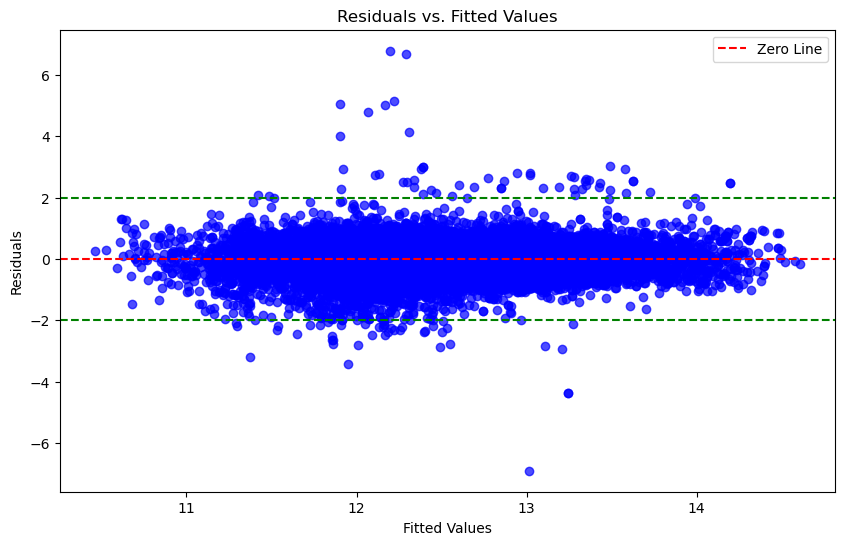

In [85]:
# Get fitted values and residuals
fitted_values = res.fittedvalues
residuals = res.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=2, color='g', linestyle='--') # y = 2
plt.axhline(y=-2, color='g', linestyle='--') # y= -2
plt.legend()
plt.show()

In [ ]:
stepwise regression pour ajouter les amenites (reg2)

petite discussion sur la colombie et les amenites pour le developpement 

donc choix d'un vecteur d'amenites controles : on revient a une regression baseline 

In [ ]:
on ajoute ce vecteur de controle a notre regression sur loyers imputes (reg1)

Notre specification : l'equation

